# Linear Model

Here in this notebook we will implement the MLP on MNIST data set..

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
# Loading the MNIST data set
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("MNIST_data/", one_hot=True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [52]:
# tensoeflow version
tf.__version__

'1.3.0'

In [53]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


# One-Hot-Encoding

The data set is already One-hot-Encode for classification which means that the labels have been converted from a single number into a vector whose lenght is equal to number of classes.

In [54]:
data.train.labels[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

We will set the true sigle value as test data as "cls" for differnt comparisons in the following code as we proceed.

In [56]:
data.test.clas = np.array([label.argmax() for label in data.test.labels])

In [57]:
data.test.clas[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

# Data Dimensions

In [58]:
# As we know that the MNIST images are 28 pixel in each dimension 
img_size = 28

# All the images are stored in this one flat dimenstiom length
img_flat = img_size *  img_size

#image shape tuple
img_shape = (img_size, img_size)

# Number of classes one for each of 10 digits
num_classes = 10


# Helper function for plotting the images 

In [63]:
# Function for plotting 9 images into 3*3 grid with true and predicted label
def plot_images(images, class_true, class_pred=None):
    assert len(images) == len(class_true) == 9
    
    # Create figure with 3x3 sub-plots.
    f, ax = plt.subplots(3, 3)
    f.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(ax.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if class_pred is None:
            xlabel = "True: {0}".format(class_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(class_true[i], class_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Plot few images to see how the images look like and if they are correct 

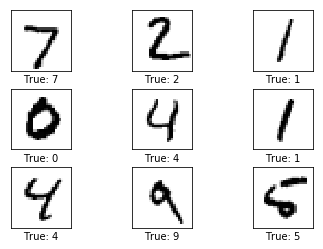

In [64]:
# First get the images form the test data
images = data.test.images[0:9]

# Get the true class form the test
class_true = data.test.clas[0:9]

# Now plot the images with the labels
plot_images(images, class_true)

In [65]:
# Placeholder x for input images with shape [none, img_flat]
x = tf.placeholder(tf.float32, [None, img_flat], name='Input')

In [66]:
# output placeholder y_true with shape [None, num_classes]
y_true = tf.placeholder(tf.float32, [None, num_classes], name='y_true')

In [67]:
y_true_class = tf.placeholder(tf.int64, [None], name='y_true_class')

# Weigts and Biases

In [68]:
weights = tf.Variable(tf.zeros([img_flat,num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

# Model 

In [69]:
logits = tf.matmul(x, weights) + biases

In [70]:
# predicted class
y_pred = tf.nn.softmax(logits)

In [71]:
# predited class name
y_pred_class = tf.argmax(y_pred, axis=1)

# Cost Function

In [72]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true))

# OPtimizer 

In [73]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Performance measure

In [74]:
correct_prediction = tf.equal(y_pred_class, y_true_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [75]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [76]:
batch_size = 100

In [88]:
def optimize(epoch):
    for i in range(epoch):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

In [78]:
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_class: data.test.clas}

In [79]:
def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [80]:
def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, class_pred = session.run([correct_prediction, y_pred_class],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[incorrect]

    # Get the true classes for those images.
    class_true = data.test.clas[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])

In [86]:
def plot_correct_predict():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, class_pred = session.run([correct_prediction, y_pred_class],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    correct = (correct == True)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[correct]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[correct]

    # Get the true classes for those images.
    class_true = data.test.clas[correct]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])

In [81]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = session.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    f, ax = plt.subplots(3, 4)
    f.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(ax.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Performance before any OPtimization

In [82]:
print_accuracy()

Accuracy on test-set: 9.8%


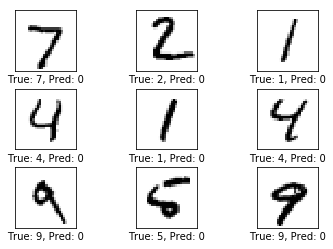

In [83]:
plot_example_errors()

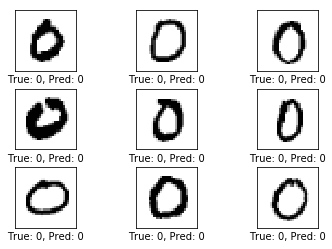

In [87]:
plot_correct_predict()

# Performance after 1 optimization

In [89]:
optimize(epoch=1)

In [90]:
print_accuracy()

Accuracy on test-set: 34.1%


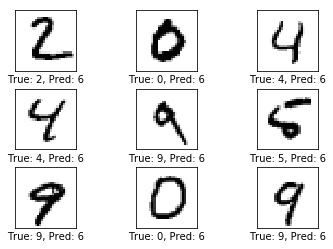

In [91]:
plot_example_errors()

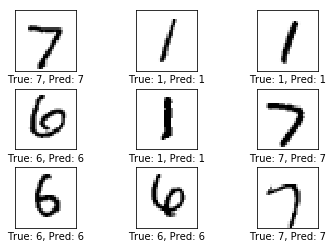

In [92]:
plot_correct_predict()

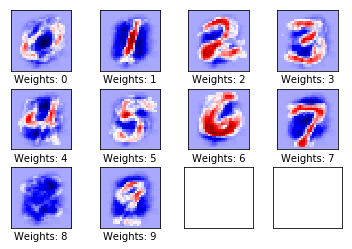

In [93]:
plot_weights()

# Performance after 10 optimizations

In [95]:
optimize(epoch=9)

In [96]:
print_accuracy()

Accuracy on test-set: 71.5%


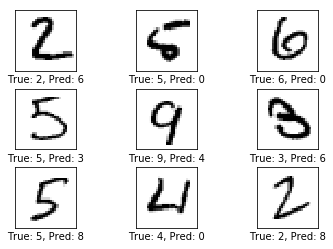

In [97]:
plot_example_errors()

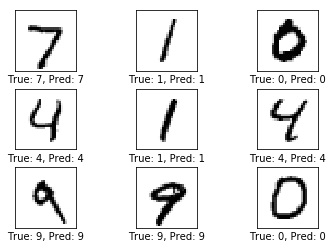

In [98]:
plot_correct_predict()

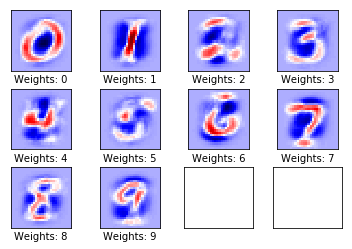

In [99]:
plot_weights()

# Performance after 1000 iterations

In [101]:
optimize(epoch=990)

In [102]:
print_accuracy()

Accuracy on test-set: 91.0%


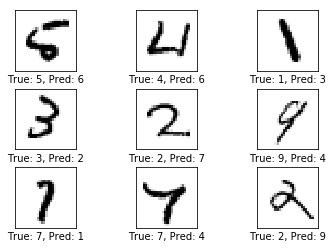

In [103]:
plot_example_errors()

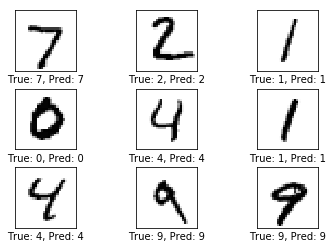

In [104]:
plot_correct_predict()

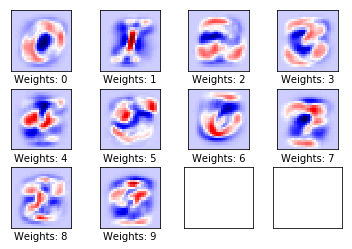

In [105]:
plot_weights()